# HOME ASSIGNMENT #4: DATABASE DESIGN & SQL

**Mục đích của bài Assignment**
> *   Hiểu các bước design Database cho Case study cụ thể: DataCracy
*   Bài tập SQL (Dựa trên Cheatsheet)
*   `[Optional]` Bài tập Python Pandas (Dựa trên Cheatsheet)

**Các kiến thức áp dụng**
* Slack API, JSON to DataFrame
* Phân tích Data (Assignment#1, Lab#1)
* Database (DB) Design
* SQL
* Python Pandas

**Lời Khuyên**
* Đây là bài tập dài, nhưng thiên về hiểu case studies và thiết kế => Nên bạn **hãy bắt đầu sớm**
* **Chắc chắn là bạn đọc thực kỹ các bước hướng dẫn và tài liệu, tận dụng Slack để trao đổi**
* **Đừng sa đà vào Code của STEP 0** (bước này tương tự Assignmetn 3 về Slack API, nhưng biến đổi thêm cho phù hợp)
* **Đừng sa đà vào các tiểu tiết** => Rất quan trọng là bạn cố gắng đi đến hết `TODO#6` để hiểu bức tranh toàn cảnh và kết nối được kiến thức. Sau khi đi hết qua, các bạn có thể trở lại và nhìn cận vào các tiểu tiết
* Làm nhiều nhất có thể (Đừng quá lo lắng nếu bạn không thể hoàn thành hết)

# CONCEPT: DB Design & SQL
## **Database (DB) - Cơ sở dữ liệu**
> Là cấu trúc các nhóm data, lưu trữ trên bộ nhớ hoặc trên cloud, cho phép truy nhập để trích xuất dữ liệu bằng nhiều cách thức khác nhau

* Cấu trúc một DB phải giúp cho việc lưu trữ an toàn, tiết kiệm, linh động và bền vững. Đồng thời, việc trích xuất dữ liệu dễ dàng, nhanh chóng, và hiệu quả.
* Dạng DB đề cập trong Atom chủ yếu là **Relational Database** => Đây là dạng cấu trúc: 
  * Dữ liệu được tổ chức và lưu trữ dưới dáng bảng (tables)
  * Đặc trưng có các keys (Primary Keys - PK, Foreign Keys - FK) để biểu diễn/quy định mối quan hệ giữa các bảng. Chính nhờ các keys này, ta có thể kết nối các bảng khác nhau.
  * Việc tách dữ liệu thành các bảng giúp việc tổ chức dữ liệu được linh động, lưu trữ hiệu quả hơn. Nhưng vẫn đảm bảo việc dễ dàng kết nối các bảng bằng keys
* Ngoài ra, còn có dạng **Non-relational Database** các bạn có thể tìm hiểu thêm ([Databases 101](https://towardsdatascience.com/databases-101-introduction-to-databases-for-data-scientists-ee18c9f0785d))

## **DB Design**
> Là quá trình thiết kế và tổ chức dữ liệu theo mô hình Database. Thiết kế quy định những dữ liệu gì được lưu trữ, tổ chức các bảng được lưu trữ như thế nào, và các bảng data liên quan đến nhau ra sao. 

* **Thiết kế DB cần thoả mãn**: 
  1. Hạn chế trùng lặp trong lưu trữ thông tin
  2. Keys chỉ mối quan hệ của các bảng (PK, FK) hợp lý
  3. Kiểm tra tính đúng đắn (liên hệ keys, chất lượng data)
  4. Hỗ trợ hiệu quả nhất cho quá trình xử lý, phân tích và báo cáo

## **SQL**
* Là ngôn ngữ dùng để trích xuất, xử lý và phân tích data trên Rational Database


# CASE STUDY: DATACracy 
* **Context**: Không có doanh nghiệp hay tổ chức nào là quá nhỏ để dùng data, và bất kỳ tổ chức nào có vận hành (operation) thì nhất định sẽ sản sinh ra data, và có thể dùng data để theo dõi và cải thiện vận hành đó (Đọc: [DataCracy - Data Strategy](https://app.gitbook.com/@anhdang/s/datacracy/atom/1-data-strategy-and-metrics))
* **Hoạt động/Vận hành**: 
  * Datacracy đang vận hành lớp học mở ATOM (với 40 learners, 6 mentors, và Ban Tổ Chức)
  * Lớp học diễn ra mỗi tuần, với bài tập được gửi vào sáng Chủ Nhật và hoàn thành trước buổi học sáng T7
  * Các bạn Learners upload link (github) vào các Slack channels theo tuần (ví dụ: `#atom-assignment-1`)
  * Các hoạt động trao đổi, hướng dẫn giữa learners, mentors và BTC chủ yếu diễn ra trong tuần qua Slack


> Bản thân Datacracy cũng có vận hành và các hoạt động. Vậy hãy dùng chính mình làm case study cho việc, ta có thể tạo ra data solution siêu nhỏ, siêu rẻ cho một tổ chức quy mô siêu nhỏ như DataCracy không?





Trong **Assignment** này, chúng ta sẽ đi qua **6 bước chính** của quá trình design DB (cho case study cụ thể của DataCracy)
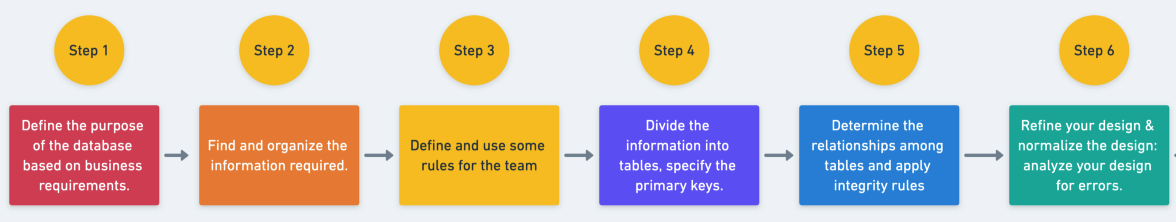

In [1]:
!pip install duckdb

In [77]:
import requests # -> Để call API
import json # -> Xử lý file JSON
import pandas as pd # -> Thư viện xử lý dữ liệu dạng bảng
import re # -> Thư viện xử lý text: regular expressions
from datetime import datetime as dt # -> Thư viện xử lý dữ liệu thời gian
import duckdb # -> Thư viện "giả lập" xử lý dữ liệu bằng SQL 
import numpy as np

## STEP 0: XEM LẠI DATA ĐÃ CÓ (SLACK API)

Ở bước đầu tiên, ta xem lại tất cả các data của DATACracy Atom mà ra đã biết: 
* **Data từ Slack API**:
  * Danh sách thành viên
  * Danh sách các channels
  * Lịch sử tin nhắn trên các channels
* **Data do dự án tự collect - File CSV (trích xuất từ Google Spreadsheet)**:
  * Danh sách thành viên được phân theo vị trí (mentors, learners, BTC)


===> Các dữ liệu này lần lượt được lấy bằng code bên dưới.


In [78]:
## Load Token file 
## WARNING!! --- Put it in gitignore and DO NOT print out to notebook
with open('env_variable.json', 'r') as j:
    json_data = json.load(j)
    
headers = {"Authorization": "Bearer {}".format(json_data['SLACK_BEARER_TOKEN'])}

### 0.1. Pull List of Members

In [79]:
# 1. LIST OF SLACK MEMBERS 

## Pull list of member as JSON
## Gọi API từ Endpoints (Input - Token được đưa vào Headers)
## Challenge: Thử gọi API này bằng Postman
endpoint = "https://slack.com/api/users.list"
headers = {"Authorization": "Bearer {}".format(json_data['SLACK_BEARER_TOKEN'])}
response_json = requests.post(endpoint, headers=headers).json() 
user_dat = response_json['members']

## Convert to CSV
user_dict = {'user_id':[],'name':[],'display_name':[],'real_name':[],'title':[],'is_bot':[]}
for i in range(len(user_dat)):
    user_dict['user_id'].append(user_dat[i]['id'])
    user_dict['name'].append(user_dat[i]['name'])
    user_dict['display_name'].append(user_dat[i]['profile']['display_name'])
    user_dict['real_name'].append(user_dat[i]['profile']['real_name_normalized'])
    user_dict['title'].append(user_dat[i]['profile']['title'])
    user_dict['is_bot'].append(user_dat[i]['is_bot'])

user_df = pd.DataFrame(user_dict) 
user_df = user_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
user_df.head()

,user_id,name,display_name,real_name,title,is_bot
0,USLACKBOT,slackbot,Slackbot,Slackbot,NaN,False
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,NaN,False
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,NaN,False
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,NaN,False


In [80]:
# Ghi dữ liệu vào file để cất lại
def write_jsonInfo(jsonFile,jsonInfo):
    with open(jsonFile,'w') as f:
        json.dump(jsonInfo, f)
    print(f"DONE! Output in {jsonFile} file")  
    
def read_jsonFile(jsonFile):
    with open(jsonFile, 'r') as f:
        json_data = json.load(f)
    return(json_data)


In [81]:
 #data_json ghi vào file   
#write_jsonInfo("UserData.json", response_json)
#user_json = read_jsonFile("UserData.json")


DONE! Output in UserData.json file


In [82]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       75 non-null     object
 1   name          75 non-null     object
 2   display_name  49 non-null     object
 3   real_name     75 non-null     object
 4   title         5 non-null      object
 5   is_bot        75 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 3.1+ KB


### 0.2. List of Channels

In [83]:
# 2. LIST OF SLACK CHANNELS

endpoint2 = "https://slack.com/api/conversations.list"
data = {'types': 'public_channel,private_channel'} # -> CHECK: API Docs https://api.slack.com/methods/conversations.list/test
response_json = requests.post(endpoint2, headers=headers, data=data).json() 
channel_dat = response_json['channels']

channel_dict = {'channel_id':[], 'channel_name':[], 'is_channel':[],'creator':[],'created_at':[],'topics':[],'purpose':[],'num_members':[]}
for i in range(len(channel_dat)):
    channel_dict['channel_id'].append(channel_dat[i]['id'])
    channel_dict['channel_name'].append(channel_dat[i]['name'])
    channel_dict['is_channel'].append(channel_dat[i]['is_channel'])
    channel_dict['creator'].append(channel_dat[i]['creator'])
    channel_dict['created_at'].append(dt.fromtimestamp(float(channel_dat[i]['created'])))
    channel_dict['topics'].append(channel_dat[i]['topic']['value'])
    channel_dict['purpose'].append(channel_dat[i]['purpose']['value'])
    channel_dict['num_members'].append(channel_dat[i]['num_members'])

channel_df = pd.DataFrame(channel_dict) 
channel_df = channel_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
channel_df.head()

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 17:25:03,NaN,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 14:28:09,NaN,NaN,12
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 10:16:30,NaN,NaN,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 14:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-17 00:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


In [84]:
# Ghi dữ liệu vào file để cất lại
#write_jsonInfo("ChannelData.json", response_json)
#channel_json = read_jsonFile("ChannelData.json")


DONE! Output in ChannelData.json file


In [85]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   channel_id    19 non-null     object        
 1   channel_name  19 non-null     object        
 2   is_channel    19 non-null     bool          
 3   creator       19 non-null     object        
 4   created_at    19 non-null     datetime64[ns]
 5   topics        6 non-null      object        
 6   purpose       13 non-null     object        
 7   num_members   19 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ KB


### 0.3. Message Data

In [86]:
endpoint3 = "https://slack.com/api/conversations.history"

In [87]:
msg_dict = {'channel_id':[],'msg_id':[], 'msg_ts':[], 'user_id':[], 'latest_reply':[],'reply_user_count':[],'reply_users':[],'github_link':[]}
for channel_id, channel_name in zip(channel_df['channel_id'], channel_df['channel_name']):
    print('Channel ID: {} - Channel Name: {}'.format(channel_id, channel_name))
    try:
        data = {"channel": channel_id} 
        response_json = requests.post(endpoint3, data=data, headers=headers).json()
        msg_ls = response_json['messages']
        for i in range(len(msg_ls)):
            if 'client_msg_id' in msg_ls[i].keys():
                msg_dict['channel_id'].append(channel_id)
                msg_dict['msg_id'].append(msg_ls[i]['client_msg_id'])
                msg_dict['msg_ts'].append(dt.fromtimestamp(float(msg_ls[i]['ts'])))
                msg_dict['latest_reply'].append(dt.fromtimestamp(float(msg_ls[i]['latest_reply'] if 'latest_reply' in msg_ls[i].keys() else 0))) ## -> No reply: 1970-01-01
                msg_dict['user_id'].append(msg_ls[i]['user'])
                msg_dict['reply_user_count'].append(msg_ls[i]['reply_users_count'] if 'reply_users_count' in msg_ls[i].keys() else 0)
                msg_dict['reply_users'].append(msg_ls[i]['reply_users'] if 'reply_users' in msg_ls[i].keys() else 0) 
                ## -> Censor message contains tokens
                text = msg_ls[i]['text']
                github_link = re.findall('(?:https?://)?(?:www[.])?github[.]com/[\w-]+/?', text)
                msg_dict['github_link'].append(github_link[0] if len(github_link) > 0 else np.nan)
    except:
        print('====> '+ str(response_json))

Channel ID: C01B4PVGLVB - Channel Name: general
Channel ID: C01BYH7JHB5 - Channel Name: contents
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01CAMNCJJV - Channel Name: branding-design
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01U6P7LZ8F - Channel Name: atom-assignment1
Channel ID: C01UL6K1C7L - Channel Name: atom-week1
Channel ID: C01ULCHGN75 - Channel Name: atom-general
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C020VMT58JK - Channel Name: topics-data-analytics
Channel ID: C0213MNH9L6 - Channel Name: topics-python
Channel ID: C0213N56M2A - Channel Name: topics-materials
Channel ID: C021FSDN7LJ - Channel Name: atom-assignment2
Channel ID: C021KLB0DSB - Channel Name: discuss-group3
Channel ID: C021KLB90GP - Channel Name: discuss-group4
Channel ID: C02204B2CD6 - Channel Name: atom-week2
Channel ID: C0220KU9399 - Channel Name: discuss-group1
Channel ID: C0226D3LEQ4 - Channel Name: atom-week3
Channel ID: C0227A51SAY - Channel Name: atom-ass

In [148]:
 #data_json ghi vào file   
#write_jsonInfo("MsgData.json", response_json)

#msg_df.to_csv('MessageData.csv')

In [147]:
msg_df = pd.DataFrame(msg_dict)
msg_df = msg_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
msg_df.tail()

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
230,C022RRWQ6US,3db33d2a-5666-44cf-95e0-dd33aee4e63c,2021-05-24 18:49:29.003700,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,0,NaN
231,C022RRWQ6US,8b4a2ebb-7882-402b-8339-a0b067ce5165,2021-05-23 14:58:23.003000,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,0,NaN
232,C022RRWQ6US,231fad01-7083-4cd0-b6b6-e97bf54779e2,2021-05-23 06:23:13.001400,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,0,https://github.com/anhdanggit/
233,C022Y1FUETE,ee582f3d-c339-4d06-a263-b71c6470e647,2021-05-24 18:49:57.001000,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,0,NaN
234,C022Y1FUETE,38adf48f-21cc-437c-9ad3-31cd002bc4f8,2021-05-23 14:58:05.001500,U01BE2PR6LU,2021-05-23 23:15:45.002200,1,[U01VB632FPS],NaN


In [90]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   channel_id        235 non-null    object        
 1   msg_id            235 non-null    object        
 2   msg_ts            235 non-null    datetime64[ns]
 3   user_id           235 non-null    object        
 4   latest_reply      235 non-null    datetime64[ns]
 5   reply_user_count  235 non-null    int64         
 6   reply_users       235 non-null    object        
 7   github_link       93 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 14.8+ KB


### 0.4. DataCracy Info
* **Data do dự án tự collect - File CSV (trích xuất từ Google Spreadsheet)**: Danh sách thành viên được phân theo vị trí (mentors, learners, BTC)
* Trong cùng folder Github `assignment_4`

In [91]:
dtc_groups = pd.read_csv('datacracy_groups.csv')
dtc_groups.head()

,name,DataCracy_role
0,slackbot,BTC
1,loclexuan26392,BTC
2,locle.ds,BTC
3,maianhdang.ftu,BTC
4,huyenhoang.design,BTC


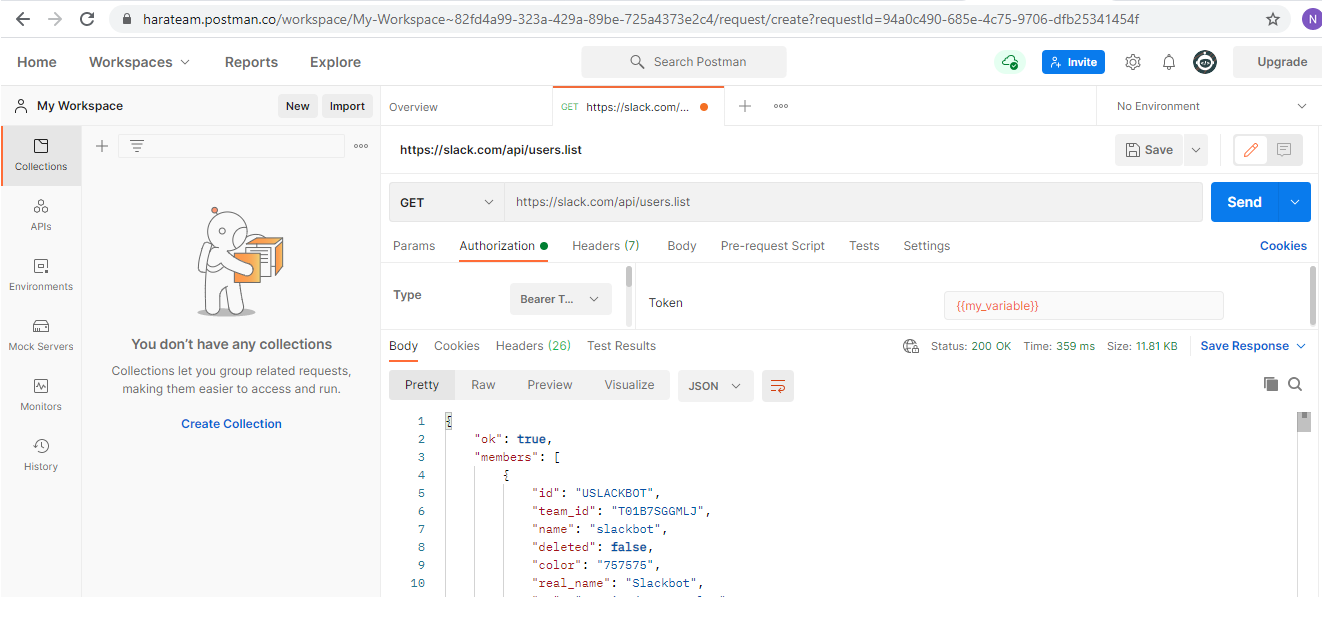

In [2]:
## Thử gọi API này bằng Postman
from IPython.display import Image
Image('img/postman.png')

## STEP 1: NHU CẦU & MỤC ĐÍCH
> Đặt mình vào vị trí người chủ, bạn quan tâm đến điều gì?

* Quan trọng nhất của mọi Data Solution, là bắt đầu từ nhu cầu, mục đích và câu hỏi lớn của Clients (người chủ). 
* Chính từ những câu hỏi lớn này, ta có thể khoanh vùng thông tin nào quan trọng, ta muốn đạt được điều gì?

### TODO#1: Requirements
Tự trả lời các câu hỏi sau, từ góc nhìn của bạn (đặt mình vào vị trí bạn là co-founder của dự án DataCracy): 
1. Mục đích của lớp học Atom là gì?
2. BTC sẽ quan tâm đến những chủ đề/quy trình gì để đạt được Mục Đích trong (1)?
3. Làm sao để đo lường các điểm trong (2)? => Metrics?
4. Dựa vào các data đã có như liệt kê trong `STEP 0`:
  * Chỉ dùng những data sẵn có, ta có thể đo lường và thiết kế những metrics nào bạn đã liệt kê trong (3)?
  * Tham khảo Slack API và hình dung về các thông tin DataCracy có khả năng thu thập, bạn sẽ đề xuất DataCracy thu thập thêm những thông tin gì?


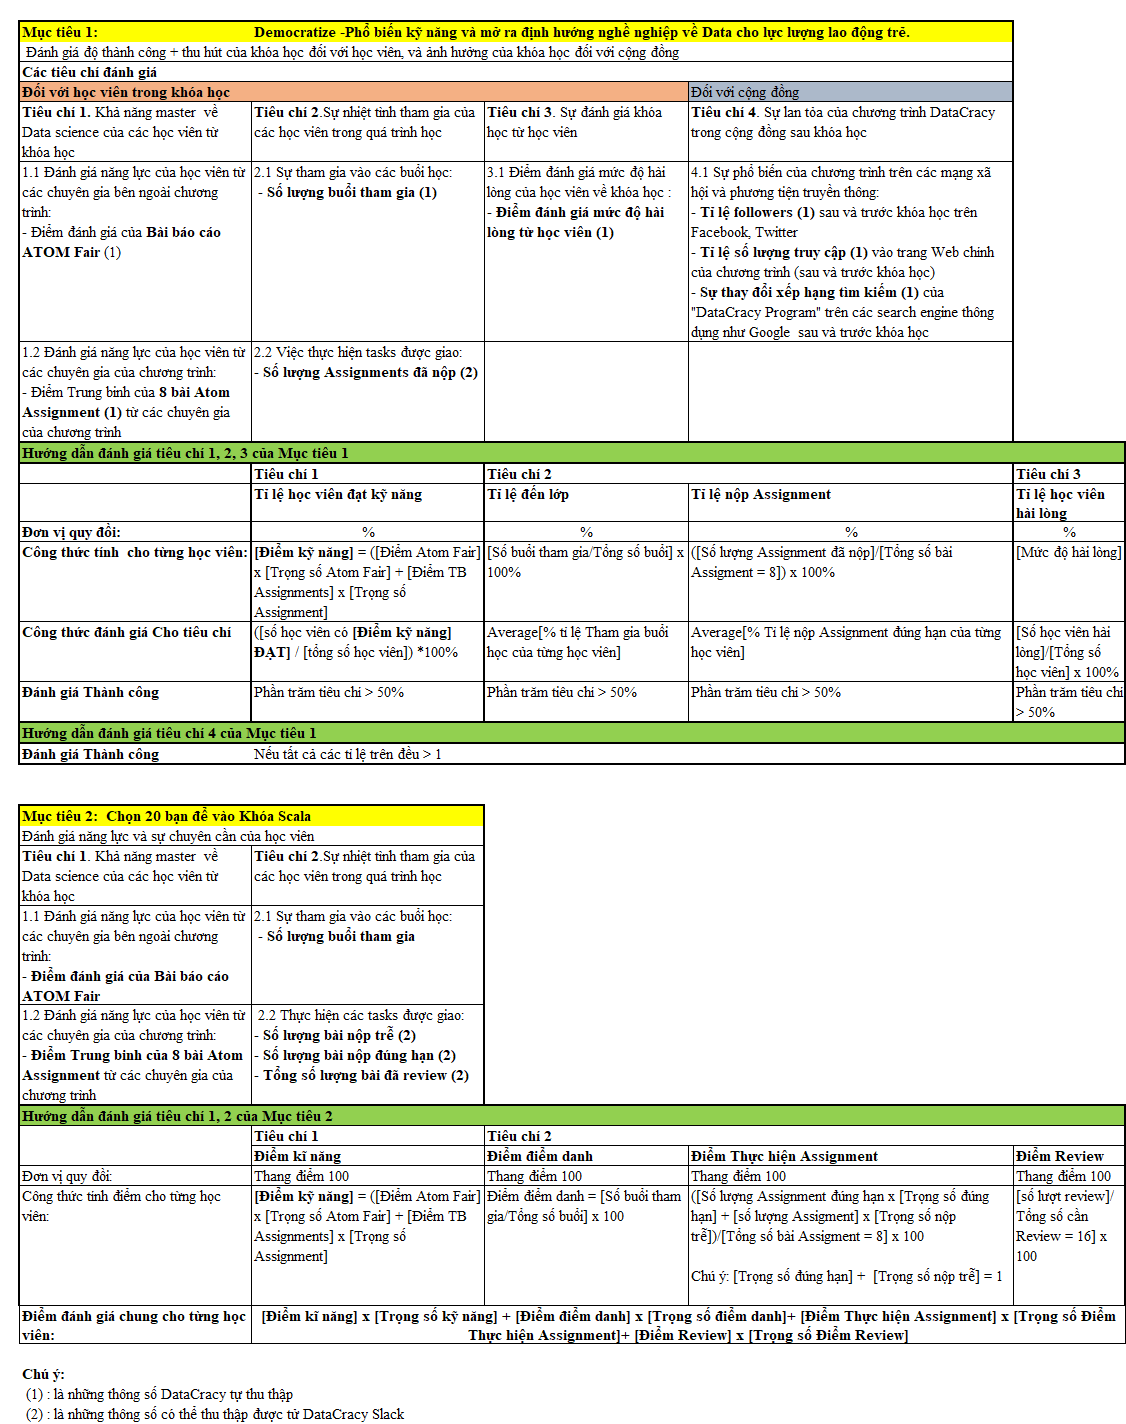

In [153]:
#TODO1
## 1.Mục đích của lớp học Atom là gì?
## 2.BTC sẽ quan tâm đến những chủ đề/quy trình gì để đạt được Mục Đích trong (1)?

''' 
1. Mục đích của lớp học Atom - Lớp học mở về Data Science:
    1.1 Mục đích chung: Democratize kỹ năng và mở ra định hướng nghề nghiệp về Data cho lực lượng lao động trẻ.
        Kỹ năng ở đây cụ thể là phương thức, các Datatools, frameworks thiết yếu trong lĩnh vực DataScience
        nhằm thu thập, làm giàu data cũng như tận dụng và khai thác dữ liệu đó một các hiệu quả. Từ đó giúp học viên
        có thể chọn cho mình những hướng đi phù hợp với khả năng và sở thích của mình trong lĩnh vực Data Science.
    1.2 Mục đích nhỏ: Chọn các học viên để đi tiếp vào khóa Scala

'''
from IPython.display import Image
Image('img/todo1_1_2.png')

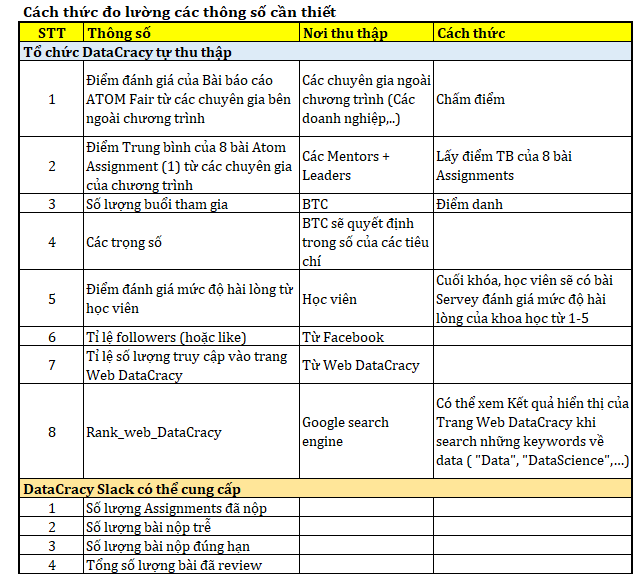

In [154]:
#TODO1
## 3. Làm sao để đo lường các điểm trong (2)? => Metrics?

from IPython.display import Image
Image('img/todo1_3.png')

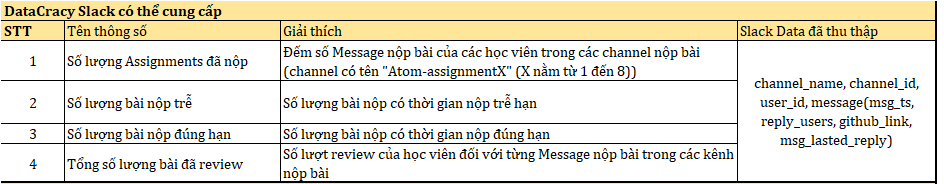

In [366]:
#TODO1
## 4. Dựa vào các data đã có như liệt kê trong STEP 0:
##    Chỉ dùng những data sẵn có, ta có thể đo lường và thiết kế những metrics nào bạn đã liệt kê trong (3)?
##    Tham khảo Slack API và hình dung về các thông tin DataCracy có khả năng thu thập,
##    bạn sẽ đề xuất DataCracy thu thập thêm những thông tin gì?


from IPython.display import Image
Image('img/todo1_4.png')

## STEP 2: TỔ CHỨC THÔNG TIN
> Thu thập và hệ thống lại các thông tin

In [92]:
## Hints: info() để check các thông tin (Column), số dòng (Count), và Data Type của mỗi cột
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       75 non-null     object
 1   name          75 non-null     object
 2   display_name  49 non-null     object
 3   real_name     75 non-null     object
 4   title         5 non-null      object
 5   is_bot        75 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 3.1+ KB


In [132]:
user_df.describe(include = 'all')

,user_id,name,display_name,real_name,title,is_bot
count,75,75,49,75,5,75
unique,75,75,48,73,5,2
top,U01C48T7S1J,dinhtuan3955,Loc Le Xuan,Loc Le Xuan,Technical Contents,False
freq,1,1,2,2,1,65


In [139]:
user_df['title'].value_counts(dropna=False)

NaN                       70
Technical Contents         1
Mentor                     1
Business Analyst           1
Volunteer - Event team     1
Learner                    1
Name: title, dtype: int64

In [93]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   channel_id    19 non-null     object        
 1   channel_name  19 non-null     object        
 2   is_channel    19 non-null     bool          
 3   creator       19 non-null     object        
 4   created_at    19 non-null     datetime64[ns]
 5   topics        6 non-null      object        
 6   purpose       13 non-null     object        
 7   num_members   19 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ KB


In [131]:
channel_df.describe(include = 'all')

<ipython-input-131-17fa163f6a43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  channel_df.describe(include = 'all')


,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
count,19,19,19,19,19,6,13,19.000000
unique,19,19,1,2,19,6,12,NaN
top,C01ULCHGN75,contents,True,U01BE2PR6LU,2021-05-08 08:45:22,TOPIC: Data Strategy. Metrics Design. Spreadsh...,Where learners submit assignments and give rev...,NaN
freq,1,1,19,18,1,1,2,NaN
first,NaN,NaN,NaN,NaN,2020-09-23 17:25:03,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-05-23 06:33:45,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.263158
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.954903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000


In [94]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   channel_id        235 non-null    object        
 1   msg_id            235 non-null    object        
 2   msg_ts            235 non-null    datetime64[ns]
 3   user_id           235 non-null    object        
 4   latest_reply      235 non-null    datetime64[ns]
 5   reply_user_count  235 non-null    int64         
 6   reply_users       235 non-null    object        
 7   github_link       93 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 14.8+ KB


In [130]:
msg_df.describe(include= 'all')

<ipython-input-130-a73866a44871>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  msg_df.describe(include= 'all')
<ipython-input-130-a73866a44871>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  msg_df.describe(include= 'all')


,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
count,235,235,235,235,235,235.000000,235.0,93
unique,14,235,235,43,102,NaN,80.0,39
top,C021FSDN7LJ,df4b3968-7ba5-4a13-ab6d-631a75f78914,2021-04-23 23:49:42.030500,U01BE2PR6LU,1970-01-01 07:00:00,NaN,0.0,https://github.com/nguyenhonghanh2511/
freq,42,1,1,66,134,NaN,134.0,6
first,NaN,NaN,2020-09-23 17:26:12.000300,NaN,1970-01-01 07:00:00,NaN,NaN,NaN
last,NaN,NaN,2021-05-24 18:49:57.001000,NaN,2021-05-24 17:50:55.035000,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.782979,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.053955,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [135]:
dtc_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            65 non-null     object
 1   DataCracy_role  59 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [136]:
dtc_groups.describe(include= 'all')

,name,DataCracy_role
count,65,59
unique,65,10
top,dinhtuan3955,Learner_Gr1
freq,1,11


In [137]:
dtc_groups['DataCracy_role'].unique()

array(['BTC', 'Volunteer', 'Learner_Gr3', 'Learner_Gr4', 'Learner_Gr1',
       nan, 'Learner_Gr2', 'Mentor_Gr4', 'Mentor_Gr1', 'Mentor_Gr2',
       'Mentor_Gr3'], dtype=object)

### TODO#2: List Down
Trả lời các câu hỏi sau: 
1. Có những thông tin gì trong các bảng data ở `STEP 0`? Ý nghĩa của mỗi trường (Column). `Hints: Đọc thêm Slack API để hiểu ý nghĩa data trả về`
2. Data Type của mỗi trường
3. Có NULL không? (Non-Null Count <> entries)

* Ta sẽ dùng công cụ: [QuickDBD](https://www.quickdatabasediagrams.com/) cho Assignment này => Tham khảo Sample lúc mở tool
* Copy điền đoạn text vào tools

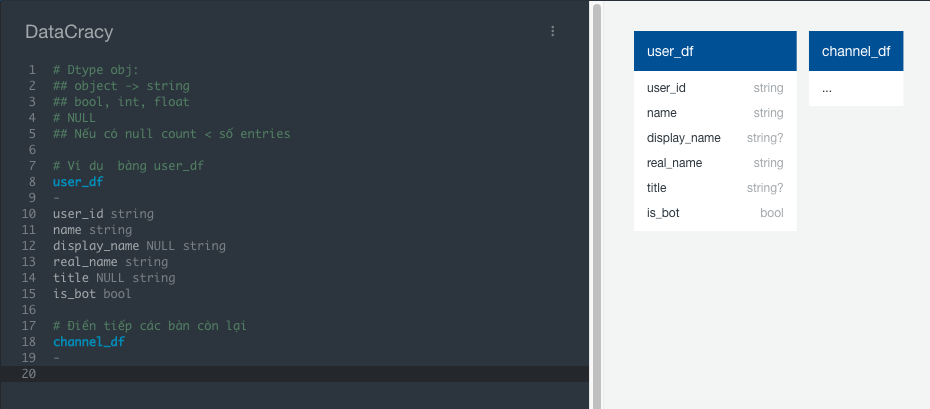

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
## Bên dưới là ví dụ của bảng user_df (Điền tiếp các bản còn lại)
''' 
# Dtype obj: object -> string, bool, int, float
# NULL - Nếu có null count < số entries

# Ví dụ  bảng user_df 
user_df
-
user_id string
name string
display_name NULL string
real_name string
title NULL string
is_bot bool

# Điền tiếp các bản còn lại

# Bảng channel_df
channel_df
-
channel_id string
channel_name string
is_channel bool
creator string
created_at datetime
topics NULL string
purpose NULL string
num_member int

# Bảng msg_df
msg_df
-
msg_id string
channel_id string
msg_ts datetime
user_id string
lasted_reply datetime
reply_user_count int
reply_users string
github_link NULL string

# Bảng dtc_groups
dtc_groups
-
name string
DataCracy_role NULL string



## STEP 3: NGUYÊN TẮC CẦN ÁP DỤNG

### TODO#3: Rules & Logics
Dựa vào các kiến nghị `TODO#1` và Quan sát ở `TODO#2`, bạn có những đề xuất gì về rules trong vận hành để cải thiện thông tin và quan sát? 

#### Về mặt vận hành
> Rules gì cần áp dụng cho cách thức nhập data?

**Một số gợi ý**
1. Rules để cải thiện tỷ lệ NULL trong các bạn? (Ví dụ: Bắt buộc nhập các thông tin trên Slack? Có cần thiết không?)
2. Làm sao để xác định message nào là bài submit assigment? Message nào là review? Message vào là các nội dung không liên quan? (Ví dụ: Users để tag #submit, #review?)
3. ...

#### Về mặt data
> Logics gì cần áp dụng để kiểm tra sự hợp lý của Data?

**Một số gợi ý**
1. Hai users trùng tên?
2. Ngày latest reply > ngày post? 
3. Ngày post trong năm 2021 (sau khi dự án DataCracy thành lập)
4. Mentor Group nào sẽ chỉ post trong channel discussion của group đó?
5. ...

Bạn có thể đưa các đề xuất để đưa vào vận hành nhằm cải thiện data và giúp bạn đo lường theo dõi các metrics đã được liệt kể trong `TODO#1`

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
''' 
RULES khi giao tiếp trên Slack
---
1.Quy tắc tạo User:
    - User nên ghi rõ các thông tin sau (real_name)
    - Trường Title nên ghi rõ (vd: Learner, Volunteer, Mentor,...)
    
2.Quy tắc tạo Channel:
    - Các channel khác nhau nên đặt tên của channel khác nhau
    - Nên viết rõ Purpose và Topic của channels khi tạo để users biết rõ chức năng và nhiệm vụ từng channel

    vd. Mỗi channel có các chức năng riêng biệt:
    - "general": thảo luận các vấn đề chung
    - "discuss-groupX": thảo luận các vấn đề riêng của group
    - "atom-assignmentX": dùng để nộp bài và review bài
    
3. Quy tắc tạo Message:
    - Tạo các message trong các channels theo đúng chức năng của channels
    
4. Quy tắc Nộp bài
    - Bài tập của phần nào thì nên post vào channel của phần đó ("atom-assignment1", "atom-assignment1")
    - Gắn tag cho message
        Ví dụ:
        #submit: cho các tin nhắn nộp bài tập
    - Phần link bài tập nên để trong phần Attachment.
    - Mỗi bài tập chỉ gắn 1 link github.
       Nếu bài tập có nhiều file (nhiều link) --> Tốt nhất liệt kê các link vào 1 file(ví dụ readme file) trên github
        và tiến hành attach link file đó (readme link)
        
5. Quy tắc Nộp lại bài
    Khi tiến hành nộp lại bài tập thì chỉ cần vào message nộp bài mà mình đã tạo cho nó trước đó và edit trên link

6. Quy tắc review bài tập
    - review bằng cách để lại reply_message trên bài mình muốn review
    - gắn tag review cho reply_message
        #review
    - Lúc đang review, gắn construction icon cho bài mình muốn review
    - Lúc review xong, gắn stick icon cho bài mình muốn review
'''

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
''' 
LOGICs cần áp dụng để quản lý data
---
1. Bảng user_df:
    1.1 user_id: required, unique (các user_id phải không trùng nhau)
    1.2 name: required, unique

2. Bảng channel_df:
    2.1 channel_id: required, unique
    2.2 channel_name: required, unique

    Others:
    - created_at >  [Ngày thành lập DataCracy]
    - creator : thuộc danh sách user_df(user_id)

3. Bảng msg_df:
    3.1 msg_id: required, unique
    3.2 channel_id: required

    Others:
    - channel_id : thuộc danh sách channel_df(channel_id)
    
    - Thời điểm khởi tạo message trong channel phải nằm sau ngày khởi tạo channel đó:
        msg_ts > channel_df(created_at) của channel đó
    - user_id : thuộc danh sách user_df(user_id)
    
    - Thời điểm lasted_reply phải nằm sau thời điểm khởi tạo message đó nếu như có người reply 
        lasted_reply > msg_ts nếu (lasted_reply != '0')
        
    - Nếu như message có nhiều người phản hồi thì số người phản hồi phải bằng với độ dài của danh sách các thành viên
    phản hồi:
        Nếu reply_users != '0' thì reply_user_count = len(reply_users), ngược lại thì bằng 0
        
    - Danh sách người tạo message và các thành viên phản hồi phải nằm trong danh sách user được ủy quyền:
        Nếu channel là public -> mọi user đều có thể tạo message và phản hồi
        Nếu channel là group -> chỉ có những user nằm trong danh sách thành viên của group mới được quyền tạo và phản hồi message
    
    - Mỗi bài, số lượt review không quá 2
'''

## STEP 4: TỔ CHỨC BẢNG - PRIMARY KEYS

In [323]:
## Hints: nunique() để check số giá trị unique của từng trường
user_df.nunique()

user_id         74
name            74
display_name    48
real_name       72
title            5
is_bot           2
dtype: int64

In [161]:
# check số giá trị unique của từng trường channel
channel_df.nunique()

channel_id      19
channel_name    19
is_channel       1
creator          2
created_at      19
topics           6
purpose         12
num_members     16
dtype: int64

In [184]:
# check số giá trị unique của từng trường msg_df
print('Count unique values in msg_df')
for i in msg_df.columns:
    try:
        print("{}: {}".format(i, len(msg_df[i].unique())))
    except Exception as e:
        print(e)

Count unique values
channel_id: 14
msg_id: 235
msg_ts: 235
user_id: 43
latest_reply: 102
reply_user_count: 6
unhashable type: 'list'
github_link: 40


In [ ]:
#msg_df có reply_users ở dạng list

In [189]:
dtc_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            65 non-null     object
 1   DataCracy_role  59 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [188]:
# check số giá trị unique của từng trường channel
dtc_groups.nunique()

name              65
DataCracy_role    10
dtype: int64

In [190]:
# các giá trị unique trong DataCracy_role
dtc_groups['DataCracy_role'].unique()

array(['BTC', 'Volunteer', 'Learner_Gr3', 'Learner_Gr4', 'Learner_Gr1',
       nan, 'Learner_Gr2', 'Mentor_Gr4', 'Mentor_Gr1', 'Mentor_Gr2',
       'Mentor_Gr3'], dtype=object)

### TODO#4: Tables & PK
1. Nhìn lại diagram của `TODO#2` trong Quick DBD Diagram: Có bảng nào bạn nghĩ nên gộp lại, hay tách ra không? Vì sao?
2. Tìm Primary Key (PK): Unique cho từng dòng và Không NULL
> Primary Key (PK) là trường giá trị/ID unique cho mỗi dòng của bảng. Hay nói cách khác, không có hai dòng trùng lặp (duplicate ID). 
* Fun fact để nhớ: Thử tưởng tượng nếu 2 người không quen biết, có cùng Số TK Ngân hàng :((((

In [ ]:
#TODO#4
## 1.Nhìn lại diagram của TODO#2 trong Quick DBD Diagram: Có bảng nào bạn nghĩ nên gộp lại, hay tách ra không? Vì sao?
'''
1.Gộp thông tin bảng user_df và dtc_groups --> lấy tên bảng mới: member_df 
    thông tin DataCracy_role được thêm vào tương ứng với các name. Ta làm được điều này vì 2 bảng trên có cùng thuộc tính name
    và thuộc tính này có tính chất unique.
     

2. Tách bảng msg_df thành 2 bảng:
    - Bảng msg_replier(iid_reply, msg_id, reply_user_id): chứa thông tin các reply_users của các message
    - Bảng message_df(msg_id, channel_id, msg_ts, user_id, lasted_reply, reply_user_count, github_link): gồm các thông tin còn lại
    
    Lý do tách: vì thuộc tính msg_df(reply_users) có kiểu giá trị là list: có nghĩa là ứng mỗi message, có thể có nhiều users
    tham gia reply.
    

'''

In [ ]:
#TODO #4
## Copy lại phần text của TODO#2
## Đặt PK bên cạnh col bạn chọn làm PK
''' 
# Dtype obj: object -> string, bool, int, float
# NULL - Nếu có null count < số entries

member_df 
-
user_id string PK
name string
display_name NULL string
real_name string
title NULL string
is_bot bool
DataCracy_role NULL string


# Bảng channel_df
channel_df
-
channel_id string PK
channel_name string
is_channel bool
creator string
created_at datetime
topics NULL string
purpose NULL string
num_member int

# Bảng message_df
message_df
-
msg_id string PK
channel_id string
msg_ts datetime
user_id string
lasted_reply datetime
reply_user_count int
github_link NULL string

# Bảng msg_replier
msg_replier
-
iid_reply string PK
msg_id string
reply_user string

'''



## STEP 5: MỐI QUAN HỆ GIỮA CÁC BẢNG

### TODO#5: FK & Mapping
Như đã giới thiệu ở phần Concept, keys quan trọng trong Relational DB vì nó thể hiện mối quan hệ giữa các bạn, thông qua key, cho phép ta nối các bảng với nhau. 
Bây giờ ta sẽ đi tìm FK (Foreign Key):
> Foreign Key: Là các keys nằm trong một bảng để liên kết với PK trong bảng khác

1. Đâu là các ID trong bảng, nhưng không phải là PK (do thoả điều kiện unique)?
2. Các ID này dẫn đến PK nào trong các bảng còn lại?
3. Trong các key được nối với nhau, xác định kiểu quan hệ:
  * n:1 - PK ở bảng gốc lặp lại nhiều lần (nhiều dòng) ở bản chứa FK
  * 1:1 - PK ở bảng gốc chỉ nối với 1 dòng

**Ví dụ:** `channel_id string FK >- channel_df.channel_id`

In [ ]:
## Copy lại phần text của TODO#2
## Đặt FK bên cạnh col bạn chọn làm FK
## Và thể hiện mối quan hệ bằng: id >- bảng_gốc.id (FK là PK trong bảng gốc)
''' 
# Ví dụ  bảng member_df 
member_df 
-
user_id string PK
name string
display_name NULL string
real_name string
title NULL string
is_bot bool
DataCracy_role NULL string

# Bảng channel_df
channel_df
-
channel_id string PK
channel_name string
is_channel bool
creator string FK >- member_df.user_id #Rel: n:1
created_at datetime
topics NULL string
purpose NULL string
num_member int

# Bảng message_df
message_df
-
msg_id string PK
channel_id string FK >- channel_df.channel_id #Rel: n:1
msg_ts datetime
user_id string FK >- member_df.user_id #Rel: n:1
lasted_reply datetime
reply_user_count int
github_link NULL string

# Bảng msg_replier
msg_replier
-
iid_reply string PK
msg_id string FK >- message_df.msg_id #Rel: n:1
reply_user string FK >- member_df.user_id #Rel: n:1

'''


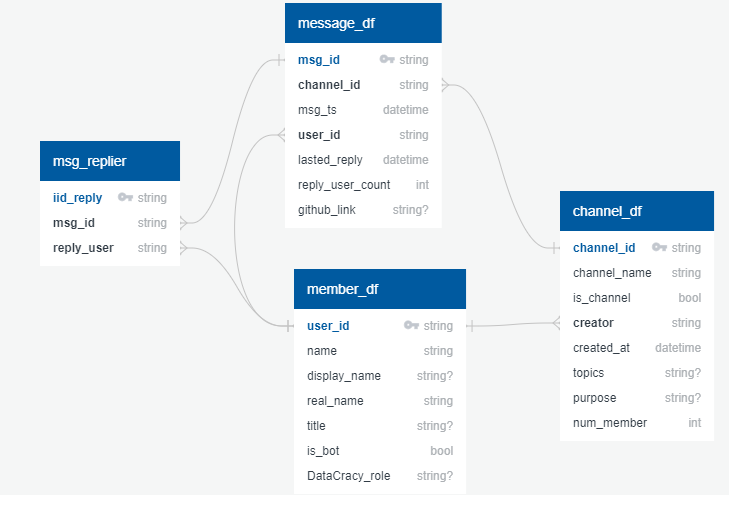

In [202]:
from IPython.display import Image
Image('img/drg_3.png')

## STEP 6: DIAGRAM & TEST
Sau khi làm hết `TODO#5` bạn sẽ được 1 DB Diagram như trong sample mẫu bên dưới (Sample này không phải của DataCracy)

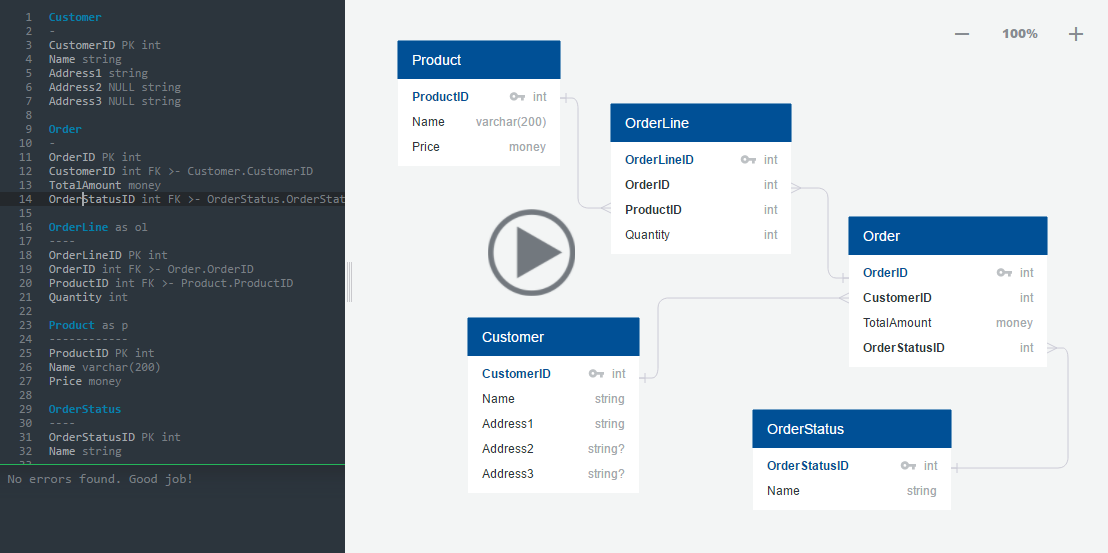

### Test Database Design by SQL
* Để giúp các bạn làm quen với việc thao tác trên SQL, ta sử dụng thư việc duckdb, cho phép ta thao tác với Data trên Python bằng SQL: https://duckdb.org/2021/05/14/sql-on-pandas.html
* Để hiểu các code SQL bên dưới, tham khảo [SQL Basic Cheatsheet](https://learnsql.com/blog/sql-basics-cheat-sheet/), xem các phần:
  * Querying Single Table
  * Aliases 
  * Filtering
  * Querying Multiple Tables: Các dạng Join
  * Aggregation Functions

* Dựa vào DB Diagram bạn đã vẽ, sẽ giúp bạn dễ dàng theo dõi hơn trong việc join và xử lý data

In [215]:
## Đoạn code dưới join 2 bảng user_df vằ dtc_groups bằng key name => Tạo thành bảng members_df
SQL_dim_members = '''
-- Để comment trong SQL dùng -- tương đường với ## trong Python
CREATE TABLE members_df AS
SELECT 
  t1.*,
  t2.DataCracy_role
FROM user_df AS t1
JOIN dtc_groups AS t2
ON t1.name = t2.name
'''

In [216]:
con = duckdb.connect(database=':memory:', read_only=False) # -> Tạo DB connection
# create a table
con.execute(SQL_dim_members) # -> Chạy đoạn lệch SQL
con.execute("SELECT * FROM members_df LIMIT 10").fetch_df() # -> In 10 dòng đầu tiên của bảng members_df ra Dataframe

,user_id,name,display_name,real_name,title,is_bot,DataCracy_role
0,USLACKBOT,slackbot,Slackbot,Slackbot,NaN,False,BTC
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,NaN,False,BTC
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,NaN,False,BTC
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False,BTC
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,NaN,False,BTC
5,U01CMTYB7EU,dr.tringuyenzmc,NaN,Dr Tringuyenzmc,NaN,False,BTC
6,U01GQR2FE93,khanguyenwk,NaN,Kha Nguyen,NaN,False,Volunteer
7,U01HARCHNKU,linhphan,NaN,Phan Linh,NaN,False,BTC
8,U01JQ5TUP0B,tt.thuchuyen,NaN,Tt Thuchuyen,NaN,False,BTC
9,U01JQ5U1RPV,thuongthuong.dv,NaN,Thuong Do,NaN,False,BTC


In [203]:
con.execute("SELECT * FROM channel_df LIMIT 5").fetch_df() # -> In 5 dòng đầu tiên của bảng channel_df ra Dataframe

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 17:25:03,NaN,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 14:28:09,NaN,NaN,12
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 10:16:30,NaN,NaN,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 14:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-17 00:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


In [204]:
con.execute("SELECT * FROM msg_df LIMIT 5").fetch_df() # -> In 5 dòng đầu tiên của bảng msg_df ra Dataframe

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
0,C01B4PVGLVB,89919b55-bfe9-4c15-bf45-3021048c7c28,2021-05-24 18:49:08.061100,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN,NaN
1,C01B4PVGLVB,18467584-5810-4bb9-80fe-4b92af9b28d0,2021-05-23 23:26:04.057000,U01UTGT8CVA,2021-05-24 15:36:52.058100,2,NaN,NaN
2,C01B4PVGLVB,dfd2bf1a-69a1-4ac3-aacb-e2daaae8cc04,2021-05-23 14:57:36.055300,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN,NaN
3,C01B4PVGLVB,fd5d6cf7-415c-459a-818c-72835fd2479a,2021-05-23 06:28:27.053900,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN,NaN
4,C01B4PVGLVB,36f75c5c-45b4-4e6a-b757-de28ee1b0275,2021-05-22 09:04:01.051100,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN,NaN


In [205]:
## Đoạn code dưới: Theo từng channel, count số message (phải join với bảng channel_df để lấy tên channel)
SQL = '''
SELECT 
  t2.channel_name,
  COUNT(DISTINCT t1.msg_id) AS msg_cnt
FROM msg_df AS t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
GROUP BY t2.channel_name 
ORDER BY COUNT(DISTINCT t1.msg_id) DESC
'''
con.execute(SQL).fetch_df()

,channel_name,msg_cnt
0,atom-assignment1,42
1,atom-assignment2,42
2,general,41
3,atom-assignment3,35
4,discuss-group1,18
5,topics-python,13
6,discuss-group3,12
7,discuss-group4,11
8,atom-week1,6
9,discuss-group2,6


In [206]:
## Đoạn code dưới: Lấy top 3 mentors post nhiều message nhất trong discuss-group của các nhóm
SQL = '''
WITH msg_cnt AS ( ------------- > (1) Chain SQL: tạo bảng tạm thời msg_cnt: count số msg theo user, theo channel
  SELECT 
    user_id,
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1, 2
)
SELECT
  t2.real_name,
  t3.channel_name,
  t1.msg_cnt,
  t2.DataCracy_role
FROM msg_cnt AS t1
JOIN members_df AS t2 ------------ > (2) Join msg_count với members_df để lấy tên và role
ON t1.user_id = t2.user_id
JOIN channel_df AS t3 --> (3) Join với channel_df để lấy tên channel
ON t1.channel_id = t3.channel_id
WHERE t2.DataCracy_role LIKE 'Mentor%' ------------- > (4) Filter Mentors
AND t3.channel_name LIKE 'discuss-group%' ---------- > (5) Filter channel discuss theo các group
ORDER BY t1.msg_cnt DESC ---------- > (6) Sẵp xếp theo số msg từ cao xuống thấp
LIMIT 3 ------------> (7) Lấy top 3
'''
con.execute(SQL).fetch_df()

,real_name,channel_name,msg_cnt,DataCracy_role
0,Nguyễn Quang Long,discuss-group3,7,Mentor_Gr3
1,Phu NDT,discuss-group1,5,Mentor_Gr1
2,Thuy Nguyen,discuss-group4,4,Mentor_Gr4


### TODO#6: SQL
* Thay đổi các phần trong những đoạn code SQL trên, print kết quả để hiểu về code
* Tham khảo thêm [SQL Basic Cheatsheet](https://learnsql.com/blog/sql-basics-cheat-sheet/)
* Và, GOOGLE! + Cùng trao đổi trên Slack
* Và viết SQL để trả lời các câu hỏi sau:
```
  1. Learners groups nào hoạt động tích cực trên Slack nhất? (tính theo message count)?
  Learners nào nộp bài sớm nhất trong Assignment 1, 2, 3?
  2. Learner nào nộp bài trễ nhất trong Assignment 1, 2, 3?
  3. Learner nào chưa nộp bài Assignment 3?
  4. Learner nào chưa nộp bất kỳ 1 assignment nào?
  5. Tỷ lệ % Learner đã nộp assignment 1, 2, 3? (*giả sử có message trong channel atom-assignment, được tính là đã submit*)
  6. Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3?
  7. Learners theo Group nào có tỷ lệ % hoàn thành bài tập cao nhất?
```
* `[Optional]` Bạn có thể tự đặt thêm bất kỳ câu hỏi nào bạn quan tâm



In [212]:
## Thử Tạo bảng message_df như trong Todo5
con = duckdb.connect(database=':memory:', read_only=False) # -> Tạo DB connection

# create a table
SQL_1 = '''
CREATE TABLE message_df AS
SELECT 
  t1.channel_id, t1.msg_id, t1.msg_ts, t1.user_id, t1.latest_reply,
  t1.reply_user_count, t1.github_link
FROM msg_df AS t1
'''
con.execute(SQL_1).fetch_df()

con.execute("SELECT * FROM message_df LIMIT 5").fetch_df()


,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,github_link
0,C01B4PVGLVB,89919b55-bfe9-4c15-bf45-3021048c7c28,2021-05-24 18:49:08.061100,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN
1,C01B4PVGLVB,18467584-5810-4bb9-80fe-4b92af9b28d0,2021-05-23 23:26:04.057000,U01UTGT8CVA,2021-05-24 15:36:52.058100,2,NaN
2,C01B4PVGLVB,dfd2bf1a-69a1-4ac3-aacb-e2daaae8cc04,2021-05-23 14:57:36.055300,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN
3,C01B4PVGLVB,fd5d6cf7-415c-459a-818c-72835fd2479a,2021-05-23 06:28:27.053900,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN
4,C01B4PVGLVB,36f75c5c-45b4-4e6a-b757-de28ee1b0275,2021-05-22 09:04:01.051100,U01BE2PR6LU,1970-01-01 07:00:00.000000,0,NaN


In [217]:
#1. Learners groups nào hoạt động tích cực trên Slack nhất? (tính theo message count)?
SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role

from members_df mb join msg_df ms on mb.user_id = ms.user_id
group by ms.user_id, mb.real_name, DataCracy_role
having count(ms.msg_id) >= all (select count(msg_id) from msg_df group by user_id)
'''
con.execute(SQL_1).fetch_df()

,user_id,real_name,DataCracy_role
0,U01BE2PR6LU,Dặng Huỳnh Mai Anh,BTC


In [261]:
#2 
#2.1 Learners nào nộp bài sớm nhất trong Assignment 1?
print("learner nộp bài atom-assignment1 sớm nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']


SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role, ms.msg_ts

from members_df mb join msg_df ms on mb.user_id = ms.user_id

where ms.msg_ts = (select Min(t1.msg_ts) 
                    from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment1' and t1.github_link != 'NaN' 
                        and t3.DataCracy_role not in ('BTC', 'Volunteer') )
'''
con.execute(SQL_1).fetch_df()


learner nộp bài atom-assignment1 sớm nhất


,user_id,real_name,DataCracy_role,msg_ts
0,U01UMJ5AQ0K,Hưng Dương Phan Nam,Learner_Gr1,2021-04-21 13:00:34.000800


In [258]:
dtc_groups['DataCracy_role'].unique()

array(['BTC', 'Volunteer', 'Learner_Gr3', 'Learner_Gr4', 'Learner_Gr1',
       nan, 'Learner_Gr2', 'Mentor_Gr4', 'Mentor_Gr1', 'Mentor_Gr2',
       'Mentor_Gr3'], dtype=object)

In [262]:
#2.2 learner nộp bài atom-assignment2 sớm nhất
print("learner nộp bài atom-assignment2 sớm nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role, ms.msg_ts

from members_df mb join msg_df ms on mb.user_id = ms.user_id

where ms.msg_ts = (select Min(t1.msg_ts) 
                    from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment2' and t1.github_link != 'NaN' 
                        and t3.DataCracy_role not in ('BTC', 'Volunteer') )
'''
con.execute(SQL_1).fetch_df()

learner nộp bài atom-assignment2 sớm nhất


,user_id,real_name,DataCracy_role,msg_ts
0,U01UQGZHSTZ,Toan Tran,Learner_Gr2,2021-05-12 22:50:48.004


In [263]:
#2.3 learner nộp bài atom-assignment3 sớm nhất
print("learner nộp bài atom-assignment3 sớm nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role, ms.msg_ts

from members_df mb join msg_df ms on mb.user_id = ms.user_id

where ms.msg_ts = (select Min(t1.msg_ts) 
                    from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment3' and t1.github_link != 'NaN' 
                        and t3.DataCracy_role not in ('BTC', 'Volunteer') )
'''
con.execute(SQL_1).fetch_df()

learner nộp bài atom-assignment3 sớm nhất


,user_id,real_name,DataCracy_role,msg_ts
0,U01UTGRMGEQ,Hanh Nguyen,Learner_Gr4,2021-05-16 19:08:08.018900


In [264]:
#3.1 learner nộp bài atom-assignment1 trễ nhất
print("learner nộp bài atom-assignment1 trễ nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role, ms.msg_ts

from members_df mb join msg_df ms on mb.user_id = ms.user_id

where ms.msg_ts = (select Max(t1.msg_ts) 
                    from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment1' and t1.github_link != 'NaN' 
                        and t3.DataCracy_role not in ('BTC', 'Volunteer') )
'''
con.execute(SQL_1).fetch_df()

learner nộp bài atom-assignment1 trễ nhất


,user_id,real_name,DataCracy_role,msg_ts
0,U01UJ9LG5U5,Danh Phan,Learner_Gr3,2021-05-10 11:51:46.004700


In [265]:
#3.2 learner nộp bài atom-assignment2 trễ nhất
print("learner nộp bài atom-assignment2 trễ nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role, ms.msg_ts

from members_df mb join msg_df ms on mb.user_id = ms.user_id

where ms.msg_ts = (select Max(t1.msg_ts) 
                    from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment2' and t1.github_link != 'NaN' 
                        and t3.DataCracy_role not in ('BTC', 'Volunteer') )
'''
con.execute(SQL_1).fetch_df()

learner nộp bài atom-assignment2 trễ nhất


,user_id,real_name,DataCracy_role,msg_ts
0,U01UTGRMGEQ,Hanh Nguyen,Learner_Gr4,2021-05-22 12:39:34.015500


In [266]:
#3.3 learner nộp bài atom-assignment3 trễ nhất
print("learner nộp bài atom-assignment3 trễ nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select ms.user_id, mb.real_name, DataCracy_role, ms.msg_ts

from members_df mb join msg_df ms on mb.user_id = ms.user_id

where ms.msg_ts = (select Max(t1.msg_ts) 
                    from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment3' and t1.github_link != 'NaN' 
                        and t3.DataCracy_role not in ('BTC', 'Volunteer') )
'''
con.execute(SQL_1).fetch_df()

learner nộp bài atom-assignment3 trễ nhất


,user_id,real_name,DataCracy_role,msg_ts
0,U01UJ9PA0MB,Hồng Dới,Learner_Gr1,2021-05-23 21:51:07.032800


In [223]:
channel_df.head(1)

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 17:25:03,NaN,This is the one channel that will always inclu...,65


In [273]:
#4. Learner nào chưa nộp bài Assignment 3?
print("Learner chưa nộp bài Assignment 3")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select mb.user_id, mb.real_name, DataCracy_role
from members_df mb
where mb.DataCracy_role like'Learner%' and 
mb.user_id not in (select t1.user_id from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name = 'atom-assignment3' and t1.github_link != 'NaN'
                                            and t3.DataCracy_role like'Learner%'

)

'''
con.execute(SQL_1).fetch_df()

Learner nào chưa nộp bài Assignment 3


,user_id,real_name,DataCracy_role
0,U01U6JM6LEB,Viet Hoang,Learner_Gr4
1,U01U6JQB695,Giang Phan,Learner_Gr1
2,U01U8CAMGB1,Ngoc Huyen,Learner_Gr1
3,U01UEJG8KHU,Trang Nguyễn,Learner_Gr3
4,U01UJ9M5TU5,Nguyen Thi Kim Minh,Learner_Gr2
5,U01UMBXJLHG,Nguyen Linh,Learner_Gr1
6,U01UMBZHU2W,Vy Le,Learner_Gr4
7,U01UMC08KL2,Minh-Thu Nguyen Hoang,Learner_Gr4
8,U01UMC0N5U2,Việt Hồng Chu,Learner_Gr1
9,U01USGKQ771,Ngo Thi Minh Trang,Learner_Gr1


In [275]:
#5. Learner nào chưa nộp bất kỳ 1 assignment nào?
print("Learner chưa nộp bất kỳ 1 assignment nào")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select mb.user_id, mb.real_name, DataCracy_role
from members_df mb
where mb.DataCracy_role like'Learner%' and 
mb.user_id not in (select t1.user_id from msg_df t1 join channel_df t2 on t1.channel_id = t2.channel_id 
                        join members_df t3 on t3.user_id = t1.user_id
                    where t2.channel_name like 'atom-assignment_' and t1.github_link != 'NaN'
                                            and t3.DataCracy_role like'Learner%'
)

'''
con.execute(SQL_1).fetch_df()

Learner chưa nộp bất kỳ 1 assignment nào


,user_id,real_name,DataCracy_role
0,U01U8CAMGB1,Ngoc Huyen,Learner_Gr1
1,U01UMBXJLHG,Nguyen Linh,Learner_Gr1
2,U01VBFY2E59,Gia Hoang Tran,Learner_Gr1
3,U0233KHLM2M,Vuthanhdat Contact,Learner_Gr4


In [367]:
#6. Tỷ lệ % Learner đã nộp assignment 1, 2, 3? (*giả sử có message trong channel atom-assignment, được tính là đã submit*)
print("Tỷ lệ % Learner đã nộp assignment 1, 2, 3")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']

SQL_1 = '''
select t1.channel_name, format(t1.submited_cnt * 100/ t.learner_cnt,'P') as 'Tỉ lệ nộp bài (%)'
from (select count(user_id) as 'learner_cnt'
        from members_df
        where DataCracy_role like 'Learner%' ) t, 
    (select count(distinct t2.user_id) as 'submited_cnt', t3.channel_name
        from msg_df t2 join channel_df t3 on t2.channel_id = t3.channel_id
            join members_df t4 on t4.user_id = t2.user_id
        where channel_name like'atom-assignment_' and t4.DataCracy_role like 'Learner%' and t2.github_link != 'NaN'
        group by t3.channel_name) t1
'''
con.execute(SQL_1).fetch_df()

Tỷ lệ % Learner đã nộp assignment 1, 2, 3


,channel_name,Tỉ lệ nộp bài (%)
0,atom-assignment1,71
1,atom-assignment2,79
2,atom-assignment3,58


In [339]:
msg_df.columns

Index(['channel_id', 'msg_id', 'msg_ts', 'user_id', 'latest_reply',
       'reply_user_count', 'reply_users', 'github_link'],
      dtype='object')

In [368]:
#7. Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3?
## Bài được review là bài có reply_user_count > 0

print("Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']
SQL_1 = '''
select t1.channel_name, format(t1.submited_cnt * 100/ t.learner_cnt, 'P') as 'Tỉ lệ bài được review (%)'
from (select count(user_id) as 'learner_cnt'
        from members_df
        where DataCracy_role like 'Learner%' ) t, 
    (select count(distinct t2.user_id) as 'submited_cnt', t3.channel_name
        from msg_df t2 join channel_df t3 on t2.channel_id = t3.channel_id
            join members_df t4 on t4.user_id = t2.user_id
        where channel_name like'atom-assignment_' and t4.DataCracy_role like 'Learner%' and t2.github_link != 'NaN'
        and t2.reply_user_count > 0
        group by t3.channel_name) t1
'''
con.execute(SQL_1).fetch_df()

Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3


,channel_name,Tỉ lệ bài được review (%)
0,atom-assignment1,61
1,atom-assignment2,69
2,atom-assignment3,28


In [384]:
#8.  Learners theo Group nào có tỷ lệ % hoàn thành bài tập cao nhất?
print("Group nào có tỷ lệ % hoàn thành bài tập cao nhất")
assignment_list = ['atom-assignment1', 'atom-assignment2','atom-assignment3']
SQL_1 = '''
WITH report_byGroup AS(
select t1.channel_name,t1.DataCracy_role, (t1.submited_cnt * 100/ t.learner_cnt) as 'Ti_le_nop'
from (select count(user_id) as 'learner_cnt', DataCracy_role
        from members_df
        where DataCracy_role like 'Learner%'
        group by DataCracy_role ) t join
    (select count(distinct t2.user_id) as 'submited_cnt', t3.channel_name,t4.DataCracy_role 
        from msg_df t2 join channel_df t3 on t2.channel_id = t3.channel_id
            join members_df t4 on t4.user_id = t2.user_id
        where channel_name like'atom-assignment_' and t4.DataCracy_role like 'Learner%' and t2.github_link != 'NaN'
        group by t3.channel_name,t4.DataCracy_role  ) t1 
    on t.DataCracy_role = t1.DataCracy_role
)
select re.DataCracy_role, round(avg(re.Ti_le_nop),2) as 'Tỉ lệ hoàn thành Trung Bình (%)'
from report_byGroup re
group by re.DataCracy_role
having  avg(re.Ti_le_nop) >= all(select avg(Ti_le_nop)
from report_byGroup
group by DataCracy_role)

'''
con.execute(SQL_1).fetch_df()

Group nào có tỷ lệ % hoàn thành bài tập cao nhất


,DataCracy_role,Tỉ lệ hoàn thành Trung Bình (%)
0,Learner_Gr2,84.67


## Pandas vs. SQL 
* Python Pandas và SQL dù là 2 ngôn ngữ khác nhau, nhưng về cách thức thao tác và chuyển đổi data thì như nhau
* Tuỳ theo từng tình huống cụ thể mà ta sẽ sử dụng Python Pandas hay SQL
* Nhưng các bước thao tác/khám phá/tổng hợp data căn bản nhất gồm:

| Thao tác   |     SQL      |  Python | SpreadSheet |
|------------|-------------|------|----------|
| Filter/Selection |  WHERE | df['col'] | Filter |
| Join Data | JOIN | .join() | - |
| Group Data |    GROUP BY   |   .groupby(col) | Pivot |
| Summarize | SUM, AVG, MIN, MAX | .sum(), .mean(), .min(), .max() | SUM, MIN, MAX |

* Tìm hiểu cách thao tác bằng Pandas. [Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) => Xem các phần:
  * **Subset(Rows & Columns)**
  * **Summarize Data**: Để làm các phép tổng hợp, thống kê
  * **Group Data**: Tương đương với Pivot trong Excel và `GROUP BY` trong SQL
  * **Combine Data**: Tương đương với `JOIN` trong SQL
  * **Plot**


In [284]:
## Ví dụ: Đoạn code (Pandas) sau làm
## 1. Group by channel_id
## 2. Count các message
## 3. Sắp xếp theo thứ tự số message từ cao xuống thấp (ascending=False)
## 4. Filter lấy Top 5
msg_df.groupby('channel_id')['msg_id'].count().sort_values(ascending=False).head(5)

channel_id
C021FSDN7LJ    42
C01U6P7LZ8F    42
C01B4PVGLVB    37
C0227A51SAY    32
C0220KU9399    18
Name: msg_id, dtype: int64

In [283]:
## Kết quả tương ứng bằng SQL
SQL = '''
  SELECT 
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1
  ORDER BY COUNT(msg_id) DESC
  LIMIT 5
'''
con.execute(SQL).fetch_df()

,channel_id,msg_cnt
0,C021FSDN7LJ,42
1,C01U6P7LZ8F,42
2,C01B4PVGLVB,37
3,C0227A51SAY,32
4,C0220KU9399,18


### TODO#7 (Optional): Pandas
* Thực hiện lại các thao tác trong `TODO#6.2` bằng Python Pandas

In [285]:
# YOUR CODE